In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library.basis_change.qft import QFT
import math
import numpy as np
from qiskit.algorithms import VQE
from qiskit_nature.algorithms import (GroundStateEigensolver,
                                      NumPyMinimumEigensolverFactory)
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureMoleculeDriver, ElectronicStructureDriverType)
from qiskit_nature.transformers.second_quantization.electronic import FreezeCoreTransformer
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import ParityMapper

import matplotlib.pyplot as plt
import numpy as np
from qiskit_nature.circuit.library import UCCSD, HartreeFock
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA, SPSA, SLSQP
from qiskit.opflow import TwoQubitReduction
from qiskit import BasicAer, Aer
from qiskit.utils import QuantumInstance
from qiskit.utils.mitigation import CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel

from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import  QAOA, VQE, NumPyMinimumEigensolver
from qiskit_optimization.applications import Knapsack
from qiskit_optimization.converters import QuadraticProgramToQubo

from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.utils import algorithm_globals, QuantumInstance

import time
import itertools

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/tmp/ipykernel_59/971413615.py:13: NatureDeprecationWarning: The qiskit_nature.algorithms.excited_state_solvers package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.algorithms.excited_state_solvers package.
  from qiskit_nature.algorithms import (GroundStateEigensolver,
/tmp/ipykernel_59/971413615.py:13: NatureDeprecationWarning: The qiskit_nature.algorithms.pes_sampler package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release . Please refer to 'https://github.com/Qiskit/qiskit-nature/issues/750' for additional information regarding 'extrapolators'.
  from qiskit_nature.algorithms import (GroundStateEigensolver,


# Knapsack Problem

## Problem definition

The Knapsack problem is a very famous issue in combinatorial optimization. It works as follows:

Given:
- A knapsack with a maximum weight
- A set of items, each having a corresponding value and weight

We need to __determine which items to include in this knapsack__, with the __objective to maximize the value__, while __respecting the weight restriction__. 

Thus, for each item, we have the option to either include it or not. No items can be broken apart.

The Knapsack Problem belongs to the class of Optimization problems, in which we seek the best answer from all feasible solutions.

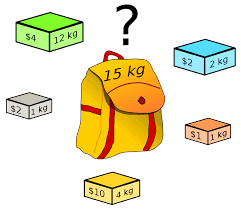

### Applications

Knapsack problem's alike situations appear in a variety of fields. Examples include:
* Selection of investments and portfolios
* Generating keys for Cryptosystems
* Resource management in software
* Power allocation management
* Waste Management

## Classic solution and computational complexity

There are multiple know solutions for the Knapsack problem. The following is an implementation of the Exhaustive Search algorithm, which consists basically of a Brute-Force method with recursion.

The time complexity for this implementation is exponential - $O(n^2)$

In [2]:
def knapsack(W, wt, val, n):
    # https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/
    
    if n == 0 or W == 0:
        return 0
    if (wt[n-1] > W):
        return knapsack(W, wt, val, n-1)
    else:
        return max( val[n-1] + knapsack(W-wt[n-1], wt, val, n-1),knapsack(W, wt, val, n-1))
 

Let's test this implementation building an example Knapsack

In [3]:
def create_knapsack(items, W):
    WT = [v[0] for v in items]
    VAL = [v[1] for v in items]
    return WT, VAL

In [4]:
knapsack1 = ([(3, 4), (2, 3)], 4)
knapsack2 = ([(3, 4), (2, 3), (2, 4)], 4)
knapsack3 = ([(3, 3), (2, 2), (2, 4), (5, 2), (5, 10)], 10)
knapsack4 = ([(3, 3), (2, 2), (2, 4), (5, 2), (5, 10), (1, 3), (1, 1)], 15)
knapsack5 = ([(3, 3), (2, 2), (2, 4), (5, 2), (5, 10), (1, 3), (1, 1), (9, 4), (8, 3)], 15)

knapsacks = [knapsack1, knapsack2, knapsack3, knapsack4, knapsack5]

In [5]:
computing_times = []

i=1
for k in knapsacks:
    items = k[0]
    W=k[1]
    WT, VAL = create_knapsack(items, W)
    
    start = time.time()
    result = knapsack(W, WT, VAL, len(VAL))
    computing_times.append((i, result, time.time() - start, len(k[0])))
    i+=1


In [6]:
times = []
for t in computing_times:
    print(
        "Knapsack ", t[0], ":   ",
        "Number of items: ", t[3], " | ",
        "Value: ", t[1], " | ",
        "Computing time: ", t[2]
    )
    times.append((t[2]))

Knapsack  1 :    Number of items:  2  |  Value:  4  |  Computing time:  1.1205673217773438e-05
Knapsack  2 :    Number of items:  3  |  Value:  7  |  Computing time:  8.821487426757812e-06
Knapsack  3 :    Number of items:  5  |  Value:  17  |  Computing time:  2.765655517578125e-05
Knapsack  4 :    Number of items:  7  |  Value:  23  |  Computing time:  0.00012826919555664062
Knapsack  5 :    Number of items:  9  |  Value:  23  |  Computing time:  0.0002167224884033203


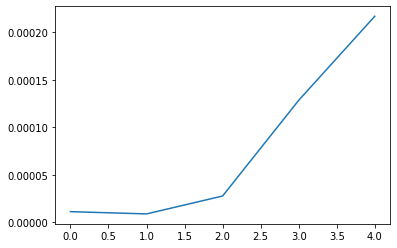

In [7]:
plt.plot(times)

## Solution from qiskit optimization libraries

### Building a knapsack
Qiskit already possesses a built-in library which includes the Knapsack problem.

Let's try this library using an example knapsack.

In [8]:
items, W = knapsack2
WT, VAL = create_knapsack(items, W)

In [9]:
prob = Knapsack(values = VAL, weights = WT, max_weight=W)
print(
"-"*15, " Knapsack " ,"-"*15, "\n",
"Values: ", prob._values,"\n",
"Weights: ", prob._weights,"\n",
"Max Weight: ", prob.max_weight,

)

---------------  Knapsack  --------------- 
 Values:  [4, 3, 4] 
 Weights:  [3, 2, 2] 
 Max Weight:  4


### Transforming to quadratic program
The optimization problems in this module are represented with the QuadraticProgram class, which is a generic and powerful representation for optimization problems.

https://qiskit.org/documentation/optimization/tutorials/02_converters_for_quadratic_programs.html

### Obtaining the Operator

In [10]:
quadratic_program = prob.to_quadratic_program()

In [11]:
print(quadratic_program.prettyprint())

Problem name: Knapsack

Maximize
  4*x_0 + 3*x_1 + 4*x_2

Subject to
  Linear constraints (1)
    3*x_0 + 2*x_1 + 2*x_2 <= 4  'c0'

  Binary variables (3)
    x_0 x_1 x_2



We can see that the Quadratic Program is able to efficiently summarize our problem, stating that we need to maximize the values, while subject to the linear constraint related to the weights.

Each of this variables (x_i) is a binary representation of an item, indicating whether or not we should include it in the Knapsack. In other words, if a value x_i equals 1, this means we should place the item in the Knapsack.If it is 0, we should not include it in our knapsack.


In the problem described above, we wish to maximize the knasack's value. This is expressed by sum of the multiplications between an item's value and its binary representation. 

For example, the case description above shows we have 3 binary variables: x_0 with the value 4, x_1 with the value 3 and x_2 with the value 4. Therefore, the total value of our knapsack can be expressed as follows:   4 * x_0 + 3 * x_1 + 4 * x_2.

So, for example, if our solution is to include items 1 and 2, our resulting expression would be the following: 4 * 0 + 3 * 1 + 4 * 1 = 7. That means, for this solution our knapsack would have the value 7.


The linear constrain related to the knapsack's weight restriction can be expressed in a similar way.In this case, the total weight is expressed by sum of the multiplications between an item's weight and its binary representation. This should be smaller than the knapsack's capacity, according to our problem's definition. The resulting expression for our example is as follows:     3 * x_0 + 2 * x_1 + 2 * x_2 <= 4.

In [12]:
quadratic_program.get_num_linear_constraints()

1

In [13]:
quadratic_program.linear_constraints

[<LinearConstraint: 3*x_0 + 2*x_1 + 2*x_2 <= 4 'c0'>]

Due to this linear constraint, we cannot convert the Quadratic Program to ising directly. However, we can still solve it by converting the problem to a Quadratic Unconstrained Binary Optimization (QUBO). A QUBO empowers quantum computers to find solutions which satisfy the problem's constraints, without forcing these constraints to be true. 

In [14]:
qubo = QuadraticProgramToQubo().convert(quadratic_program)
print(qubo.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Minimize
 obj: - 292 x_0 - 195 x_1 - 196 x_2 - 96 c0@int_slack@0 - 192 c0@int_slack@1
      - 96 c0@int_slack@2 + [ 216 x_0^2 + 288 x_0*x_1 + 288 x_0*x_2
      + 144 x_0*c0@int_slack@0 + 288 x_0*c0@int_slack@1 + 144 x_0*c0@int_slack@2
      + 96 x_1^2 + 192 x_1*x_2 + 96 x_1*c0@int_slack@0 + 192 x_1*c0@int_slack@1
      + 96 x_1*c0@int_slack@2 + 96 x_2^2 + 96 x_2*c0@int_slack@0
      + 192 x_2*c0@int_slack@1 + 96 x_2*c0@int_slack@2 + 24 c0@int_slack@0^2
      + 96 c0@int_slack@0*c0@int_slack@1 + 48 c0@int_slack@0*c0@int_slack@2
      + 96 c0@int_slack@1^2 + 96 c0@int_slack@1*c0@int_slack@2
      + 24 c0@int_slack@2^2 ]/2 + 192
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= c0@int_slack@0 <= 1
 0 <= c0@int_slack@1 <= 1
 0 <= c0@int_slack@2 <= 1

Binaries
 x_0 x_1 x_2 c0@int_slack@0 c0@int_slack@1 c0@int_slack@2
End



We can now convert our problem to ising

In [15]:
operator, offset = qubo.to_ising()
print("Ising Hamiltonian:")
print(str(operator))

Ising Hamiltonian:
-52.0 * IIIIIZ
- 34.5 * IIIIZI
- 34.0 * IIIZII
- 18.0 * IIZIII
- 36.0 * IZIIII
- 18.0 * ZIIIII
+ 36.0 * IIIIZZ
+ 36.0 * IIIZIZ
+ 24.0 * IIIZZI
+ 18.0 * IIZIIZ
+ 12.0 * IIZIZI
+ 12.0 * IIZZII
+ 36.0 * IZIIIZ
+ 24.0 * IZIIZI
+ 24.0 * IZIZII
+ 12.0 * IZZIII
+ 18.0 * ZIIIIZ
+ 12.0 * ZIIIZI
+ 12.0 * ZIIZII
+ 6.0 * ZIZIII
+ 12.0 * ZZIIII


Finally, we can obtain the matrix related to our problem.

In [16]:
matrix = operator.to_matrix()
matrix

array([[101.5+0.j,   0. +0.j,   0. +0.j, ...,   0. +0.j,   0. +0.j,
          0. +0.j],
       [  0. +0.j, -82.5+0.j,   0. +0.j, ...,   0. +0.j,   0. +0.j,
          0. +0.j],
       [  0. +0.j,   0. +0.j, -45.5+0.j, ...,   0. +0.j,   0. +0.j,
          0. +0.j],
       ...,
       [  0. +0.j,   0. +0.j,   0. +0.j, ..., 201.5+0.j,   0. +0.j,
          0. +0.j],
       [  0. +0.j,   0. +0.j,   0. +0.j, ...,   0. +0.j,  94.5+0.j,
          0. +0.j],
       [  0. +0.j,   0. +0.j,   0. +0.j, ...,   0. +0.j,   0. +0.j,
        486.5+0.j]])

We can now summarize the process explained above in a single function, to facilitate its use.

In [17]:
def get_operator_matrix(prob):
    quadratic_program = prob.to_quadratic_program()
    qubo = QuadraticProgramToQubo().convert(quadratic_program)
    operator, offset = qubo.to_ising()
    return qubo, operator, operator.to_matrix()

In [18]:
start = time.time()
qubo, operator, matrix = get_operator_matrix(prob)
end = time.time()
print("Elapsed time: ", end - start)

Elapsed time:  0.07706809043884277


## Solving the Knapsack with Qiskit's Optimizers

### Solving the problem using NumPyMinimumEigensolver (classical solution)

The NumPyMinimumEigensolver searches over feasible states and returns an eigenstate that has the smallest eigenvalue among feasible states. This solver implements a classical approach to find the solution to our problem.
It returns a boolean related to each value to indicate whether to consider this value or not.

In [19]:
start = time.time()
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(quadratic_program)
print('result:\n', result)
print('\n index of the chosen items:', prob.interpret(result)) 
print("Elapsed time: ", time.time() - start)

result:
 fval=7.0, x_0=0.0, x_1=1.0, x_2=1.0, status=SUCCESS

 index of the chosen items: [1, 2]
Elapsed time:  0.08185482025146484


### Solving the problem using QAOA (Quantum Approximate Optimization Algorithm) 

This algorithm consists of a classical-quantum hybrid technique that can be used to find approximate solutions to combinatorial optimization problems. It is important to state that the QAOA methodology consists of a heuristic algorithm. Thus, it does not necessarily assure the best performance.


It is a variational algorithm that uses a unitary to prepare a quantum state. This unitary is characterized by two parameters: ($\beta$, $\gamma$). The goal of the algorithm is to find optimal parameters ($\beta opt$, $\gamma opt$) so thtat the quantum state with these parameters encodes the solution to the problem.


The unitary $U(\boldsymbol{\beta}, \boldsymbol{\gamma})$ has a specific form and is composed of two unitaries $U(\boldsymbol{\beta}) = e^{-i \boldsymbol{\beta} H_B}$ and $U(\boldsymbol{\gamma}) = e^{-i \boldsymbol{\gamma} H_P}$ where $H_{B}$ is the mixing Hamiltonian and $H_{P}$ is the problem Hamiltonian. 

The state is prepared by applying these unitaries as alternating blocks of the two unitaries applied $p$ times such that 

$$\lvert \psi(\boldsymbol{\beta}, \boldsymbol{\gamma}) \rangle = \underbrace{U(\boldsymbol{\beta}) U(\boldsymbol{\gamma}) 
                                            \cdots U(\boldsymbol{\beta}) U(\boldsymbol{\gamma})}_{p \; \text{times}} 
\lvert \psi_0 \rangle$$

where $|\psi_{0}\rangle$ is a suitable initial state.




Reference: https://learn.qiskit.org/course/ch-applications/solving-combinatorial-optimization-problems-using-qaoa

In [30]:
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver

start = time.time()
seed = 123
algorithm_globals.random_seed = seed
qins = QuantumInstance(backend=Aer.get_backend('statevector_simulator'), seed_simulator=seed, seed_transpiler=seed)
cobyla = COBYLA()
cobyla.set_options(maxiter=250)

meo = QAOA(optimizer=cobyla, reps=3, quantum_instance=qins)
qaoa = MinimumEigenOptimizer(meo)
result = qaoa.solve(quadratic_program)



print('result:\n', result)
print('\n index of the chosen items:', prob.interpret(result)) 
print("Elapsed time: ", time.time() - start)

result:
 fval=7.0, x_0=0.0, x_1=1.0, x_2=1.0, status=SUCCESS

 index of the chosen items: [1, 2]
Elapsed time:  3.639291763305664


In [22]:
start = time.time()
seed = 123
algorithm_globals.random_seed = seed
qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), seed_simulator=seed, seed_transpiler=seed)

meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qins))
result = meo.solve(quadratic_program)
print('result:\n', result)
print('\n index of the chosen items:', prob.interpret(result)) 
print("Elapsed time: ", time.time() - start)

result:
 fval=7.0, x_0=0.0, x_1=1.0, x_2=1.0, status=SUCCESS

 index of the chosen items: [1, 2]
Elapsed time:  0.49068784713745117


### Solving the problem using VQE (Variational Quantum Eigensolver)

Another Quantum Optimization algorithm that can be used to solve our problem consists of the VQE. It is a hybrid algorithm that uses both classical and quantum computation to find the ground state of a given physical system.Given an initial guess, it calculates the expectation value of the system with respect to a Hamiltonian and a classical optimizer is used to improve the guess.

In [21]:
start = time.time()
seed = 123
algorithm_globals.random_seed = seed
qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), seed_simulator=seed, seed_transpiler=seed)

meo = MinimumEigenOptimizer(min_eigen_solver=VQE(quantum_instance=qins))
result = meo.solve(quadratic_program)
print('result:\n', result)
print('\n index of the chosen items:', prob.interpret(result)) 
print("Elapsed time: ", time.time() - start)

result:
 fval=7.0, x_0=0.0, x_1=1.0, x_2=1.0, status=SUCCESS

 index of the chosen items: [1, 2]
Elapsed time:  1.2606267929077148


## Times for multiple items

In [62]:
def prepare_quantum_knapsack(prob):
    quadratic_program = prob.to_quadratic_program()
    qubo = QuadraticProgramToQubo().convert(quadratic_program)
    operator, offset = qubo.to_ising()
    qubo, operator, matrix = get_operator_matrix(prob)
    return quadratic_program, qubo, operator, matrix

In [92]:
computing_times_quantum = []

i=1
for k in knapsacks:
    
    items = k[0]
    W=k[1]
    WT, VAL = create_knapsack(items, W)
    prob = Knapsack(values = VAL, weights = WT, max_weight=W)
    
    quadratic_program, qubo, operator, matrix = prepare_quantum_knapsack(prob)
    
    start = time.time()
    seed = 123
    algorithm_globals.random_seed = seed
    qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), seed_simulator=seed, seed_transpiler=seed)

    meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qins))
    result = meo.solve(quadratic_program)
    
    computing_times_quantum.append((i, len(k[0]) , result, prob.interpret(result), time.time() - start))
    i+=1

In [93]:
times_quantum = []
for t in computing_times_quantum:
    print(
        "Knapsack ", t[0], ":   ",
        "Number of items: ", t[1], " | ",
        "Result: ", t[2], " | ",
        "Items chosen: ", t[3], " | ",
        "Computing time: ", t[4]
    )
    times_quantum.append((t[4]))

Knapsack  1 :    Number of items:  2  |  Result:  fval=4.0, x_0=1.0, x_1=0.0, status=SUCCESS  |  Items chosen:  [0]  |  Computing time:  0.4118311405181885
Knapsack  2 :    Number of items:  3  |  Result:  fval=7.0, x_0=0.0, x_1=1.0, x_2=1.0, status=SUCCESS  |  Items chosen:  [1, 2]  |  Computing time:  0.5586342811584473
Knapsack  3 :    Number of items:  5  |  Result:  fval=17.0, x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=1.0, status=SUCCESS  |  Items chosen:  [0, 2, 4]  |  Computing time:  2.3582069873809814
Knapsack  4 :    Number of items:  7  |  Result:  fval=22.0, x_0=1.0, x_1=1.0, x_2=1.0, x_3=0.0, x_4=1.0, x_5=1.0, x_6=0.0, status=SUCCESS  |  Items chosen:  [0, 1, 2, 4, 5]  |  Computing time:  4.181078910827637
Knapsack  5 :    Number of items:  9  |  Result:  fval=23.0, x_0=1.0, x_1=1.0, x_2=1.0, x_3=0.0, x_4=1.0, x_5=1.0, x_6=1.0, x_7=0.0, x_8=0.0, status=SUCCESS  |  Items chosen:  [0, 1, 2, 4, 5, 6]  |  Computing time:  144.64752864837646


In [25]:
computing_times_quantum_numpy = []

i=1
for k in knapsacks:
    
    items = k[0]
    W=k[1]
    WT, VAL = create_knapsack(items, W)
    prob = Knapsack(values = VAL, weights = WT, max_weight=W)
    
    quadratic_program, qubo, operator, matrix = prepare_quantum_knapsack(prob)
    
    start = time.time()
    meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
    result = meo.solve(quadratic_program)
    
    computing_times_quantum_numpy.append((i, len(k[0]) , result, prob.interpret(result), time.time() - start))
    i+=1

In [26]:
times_quantum_numpy = []
for t in computing_times_quantum_numpy:
    print(
        "Knapsack ", t[0], ":   ",
        "Number of items: ", t[1], " | ",
        "Result: ", t[2], " | ",
        "Items chosen: ", t[3], " | ",
        "Computing time: ", t[4]
    )
    times_quantum_numpy.append((t[4]))

Knapsack  1 :    Number of items:  2  |  Result:  fval=4.0, x_0=1.0, x_1=0.0, status=SUCCESS  |  Items chosen:  [0]  |  Computing time:  0.03841376304626465
Knapsack  2 :    Number of items:  3  |  Result:  fval=7.0, x_0=0.0, x_1=1.0, x_2=1.0, status=SUCCESS  |  Items chosen:  [1, 2]  |  Computing time:  0.03138375282287598
Knapsack  3 :    Number of items:  5  |  Result:  fval=17.0, x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=1.0, status=SUCCESS  |  Items chosen:  [0, 2, 4]  |  Computing time:  0.06200909614562988
Knapsack  4 :    Number of items:  7  |  Result:  fval=23.0, x_0=1.0, x_1=1.0, x_2=1.0, x_3=0.0, x_4=1.0, x_5=1.0, x_6=1.0, status=SUCCESS  |  Items chosen:  [0, 1, 2, 4, 5, 6]  |  Computing time:  0.13080835342407227
Knapsack  5 :    Number of items:  9  |  Result:  fval=23.0, x_0=1.0, x_1=1.0, x_2=1.0, x_3=0.0, x_4=1.0, x_5=1.0, x_6=1.0, x_7=0.0, x_8=0.0, status=SUCCESS  |  Items chosen:  [0, 1, 2, 4, 5, 6]  |  Computing time:  0.4580976963043213


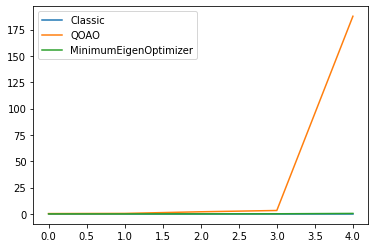

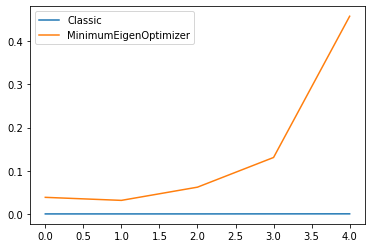

In [27]:
plt.plot(times, label = "Classic")
plt.plot(times_quantum, label = "QOAO")
plt.plot(times_quantum_numpy, label = "MinimumEigenOptimizer")
plt.legend()
plt.show()

plt.plot(times, label = "Classic")
# plt.plot(times_quantum, label = "QOAO")
plt.plot(times_quantum_numpy, label = "MinimumEigenOptimizer")
plt.legend()
plt.show()

## Running on a Quantum Computer

Let's test our solutions on a real quantum computer.

In this case, it is important to remember that real quantum computers have a qubit number limitation to run programs. Most quantum systems available at IBM for free have a limitation of a maximum of 5 qubits per application. However, the ibm_oslo and ibm_nairobi are able to run programs with up to 7 qubits. The specifications and current number of pending jobs at each IBM available system are described in the following link. Using it we can also check the least busy quantum system with this specification (7 qubits maximum):

https://quantum-computing.ibm.com/services/resources?tab=yours&status=Online&resourceType=systems

In [30]:
times_quantum_real = []
for t in computing_times_real_quantum:
    print(
        "Knapsack ", t[0], ":   ",
        "Number of items: ", t[1], " | ",
        "Result: ", t[2], " | ",
        "Items chosen: ", t[3], " | ",
        "Computing time: ", t[4]
    )
    times_quantum_real.append((t[4]))

Knapsack  1 :    Number of items:  2  |  Result:  fval=4.0, x_0=1.0, x_1=0.0, status=SUCCESS  |  Items chosen:  [0]  |  Computing time:  13028.820293188095


In [30]:
backend = provider.get_backend('ibm_oslo')
# backend = provider.get_backend('ibmq_manila')
backend

<IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>

In [31]:
computing_times_real_quantum = []

i=1
for k in knapsacks:
    items = k[0]
    W=k[1]
    WT, VAL = create_knapsack(items, W)
    prob = Knapsack(values = VAL, weights = WT, max_weight=W)
    
    quadratic_program, qubo, operator, matrix = prepare_quantum_knapsack(prob)
    
    try:
        start = time.time()
        meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=backend))
        result = meo.solve(quadratic_program)

        computing_times_real_quantum.append((i, len(k[0]) , result, prob.interpret(result), time.time() - start))
    except:
        print("Qubit number limitation")
    i+=1

Qubit number limitation
Qubit number limitation
Qubit number limitation


In [32]:
times_quantum_real = []
for t in computing_times_real_quantum:
    print(
        "Knapsack ", t[0], ":   ",
        "Number of items: ", t[1], " | ",
        "Result: ", t[2], " | ",
        "Items chosen: ", t[3], " | ",
        "Computing time: ", t[4]
    )
    times_quantum_real.append((t[4]))

Knapsack  1 :    Number of items:  2  |  Result:  fval=4.0, x_0=1.0, x_1=0.0, status=SUCCESS  |  Items chosen:  [0]  |  Computing time:  6041.067609548569
Knapsack  2 :    Number of items:  3  |  Result:  fval=7.0, x_0=0.0, x_1=1.0, x_2=1.0, status=SUCCESS  |  Items chosen:  [1, 2]  |  Computing time:  4203.031319856644


--------------

## Solving the Knapsack problem using an Oracle

Another possible solution for the Knapsack Problem can be implemented by creating an oracle. This oracle can basically state if a given solution is valid or not. The function implemented in the following performs the summation of the weights. If this value is lower than the defined weight limitation, it returns the sum of the values.

We must also ensure reversibility. That means a unique input must result in a unique output. We can do this by including a copy of the input in the output.

In [17]:
## Our original Knapsack example
print(
"-"*15, " Knapsack " ,"-"*15, "\n",
"Values: ", prob._values,"\n",
"Weights: ", prob._weights,"\n",
"Max Weight: ", prob.max_weight,

)

---------------  Knapsack  --------------- 
 Values:  [12, 6, 7, 2, 10, 3, 1, 4, 3, 5] 
 Weights:  [3, 2, 3, 4, 5, 1, 1, 9, 8, 3] 
 Max Weight:  10


In [18]:
def oracle(prob):
    values = prob._values
    weights =  prob._weights
    max_weight = prob.max_weight
    
    if np.sum(weights)<=max_weight:
        ## The oracle should return the original arguments to be reversible
        return prob, np.sum(values)
    else:
        return prob, -1

Using our oracle, we can create a function to test all possible knapsack solutions. That means, we can create vectors related to all entry possibilities, in which each position is related to an item. For each item, we can:
* include it in the knapsack (value equals 1)

                    OR

* exclude it from the knapsack (value equals 0)

This means, we will generate $2^n$ binary vectors of length corresponding to the number of items we have.

We can then use these vectors as a reference for entry vectors to apply our oracle.

The oracle will tell us whether a solution is viable or not and, if so, it will also provide us with the sum of all values from the items of the given knapsack.

We can then compare all generated solutions and get the max value, which will correspond to the optimal solution of our knapsack.

In [19]:
def solve_knapsack(prob):
    all_combinations = (list(itertools.product([0, 1], repeat=len(prob._values))))
    all_solutions = []
    for comb in all_combinations:
        val = []
        wt = []
        indexes = []
        for i,c in enumerate(comb):
            if c != 0:
                indexes.append(i)
                val.append(prob._values[i])
                wt.append(prob._weights[i])
        sub_prob = Knapsack(values = val, weights = wt, max_weight=W)
        solution = oracle(sub_prob)[1]
        if solution != -1:
            all_solutions.append((indexes, solution))
            
    values = [v[1] for v in all_solutions]
    best_sol = max(values)
    solutions = []
    for s in all_solutions:
        if int(s[1]) == int(best_sol):
            solutions.append(s)
    return solutions


In [20]:
solutions = solve_knapsack(prob)
for s in solutions:
    print(s)

([0, 1, 2, 5, 6], 29)


The solution implemented above is in no way an efficient one. All the possibilities need to be previously generated and then calculated. For knapsack instances with a small number of items this may not be perceived as a problem. However, as the number of items increases, the algorithm may take too long to provide a solution. In an even worse scenario, if the count of items grows significantly, the solution may run indefinitely and not provide any results.

A possible way to optimize this is with the help of Quantum Computing. With the help of Hadamard gates, we may create a superposition of states 0 and 1. That means we can simultaneously include and exclude each item from the knapsack. It also means we would not need to generate all possible solution and test each one of them. Consequently, the computational complexity is expected to decrease and we should be able to solve the problem in a considerably smaller amount of time.

## Alternative implementation of oracle using Quantum based addition

We can also create a quantum solution similar to the one previously described with the help of an addition circuit.

In [21]:
def add(n1,n2, display_circuit=False): 
       
    b1 = str(bin(n1))[2:]
    b2 = str(bin(n2))[2:]
    
    b1 = ((len(b1)//2)+1)*'0' + b1
    b2 = ((len(b2)//2)+1)*'0' + b2
    
    n=max(len(b1),len(b2))
         
    #create a quantum circuit
    reg_n1=QuantumRegister(n,'n1')
    reg_n2=QuantumRegister(n,'n2')
    # carry_reg=QuantumRegister(1,'carry')
    classic_reg=ClassicalRegister(n,'classic')
    qc=QuantumCircuit(reg_n1,reg_n2,classic_reg)
    
    initial_state = [1,0]   
    for j in range(2*n):
        qc.initialize(initial_state, j) 
    
    for i in range(0,len(b1)):
        if int(b1[i]) == 1:
            qc.x(len(b1)-1-i)
    for i in range(0,len(b2)):
        if int(b2[i]) == 1:
            qc.x(n+(len(b2)-1-i))
            
    qc.append(QFT(n, do_swaps=False),[i for i in range(n)])
    for i in range(n):
        for j in range(i+1):  
            qc.cp(math.pi/2**(i-j),reg_n2[j],reg_n1[i])

    qc.append(QFT(n, do_swaps=False).inverse(),[i for i in range(n)])
    for i in range(n):
        qc.measure(i,i)
        
    if display_circuit:
        display(qc.draw())
   
    shots_num = 10000
    job = execute(qc, Aer.get_backend("qasm_simulator"), shots = shots_num)

    result = job.result()
    counts = result.get_counts()
    
    if int(list(counts.keys())[0],2)<n1 or int(list(counts.keys())[0],2)<n2:
        shots_num = 10000
        job = execute(qc, Aer.get_backend("qasm_simulator"), shots = shots_num)

        result = job.result()
        counts = result.get_counts()
    number_result = int(list(counts.keys())[0],2)
    
    return number_result

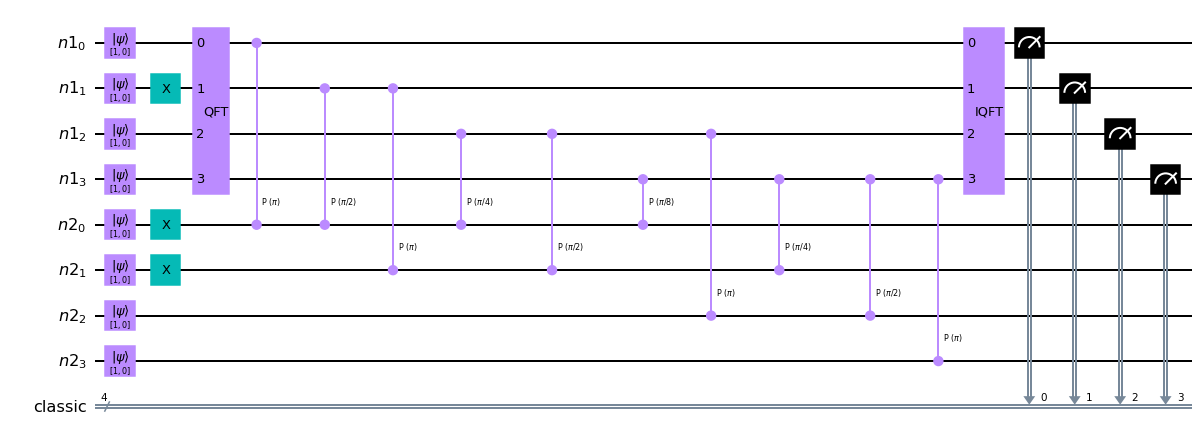

5

In [22]:
## Addition example
add(2,3, display_circuit=True)

In the following, an alternative solution to the Knapsack problem is presented, based on an heuristic approach. Though simpler, this solution may not provide an optimal result.

In [23]:
def quantum_heuristic_knapsack(max_weight, items):
    knapsack_value = 0
    knapsack_weight = 0
    selected_items=[]
    sorted_by_weight = sorted(items, key=lambda tup: tup[0])

    for pos,item in enumerate(sorted_by_weight):
        x =  add(item[0],knapsack_weight)
        print(knapsack_weight,item[0],x)
        if x <= max_weight:
            print("adding item")
            knapsack_value = add(item[1], knapsack_value)
            knapsack_weight = x
            selected_items.append(pos)
        else:
            print("weight limit reached")
            break
    
    return selected_items, items
    
    

In [24]:
quantum_heuristic_knapsack(10, example_items)

0 1 1
adding item
1 1 2
adding item
2 2 4
adding item
4 3 7
adding item
7 3 10
adding item
10 3 13
weight limit reached


([0, 1, 2, 3, 4],
 [(3, 12),
  (2, 6),
  (3, 7),
  (4, 2),
  (5, 10),
  (1, 3),
  (1, 1),
  (9, 4),
  (8, 3),
  (3, 5)])

# References 

https://iopscience.iop.org/article/10.1088/1742-6596/735/1/012083/pdf

https://github.com/qiskit-community/ibm-quantum-challenge-fall-2021/blob/main/solutions-by-authors/challenge-4/challenge-4.ipynb

https://qiskit.org/documentation/stable/0.25/_modules/qiskit/optimization/applications/ising/knapsack.html#get_operator

https://github.com/Qiskit/qiskit-optimization/blob/main/docs/tutorials/06_examples_max_cut_and_tsp.ipynb